In [5]:
import snap
import sys
import os
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
sys.path.append('../')
from src.util import influence_maximisation, get_influence_set, getInletIds

In [6]:
G_LS174T = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/LS174T_clean_EdgesList.txt", 0, 1, '\t')
G_SW1222 = snap.LoadEdgeList(snap.PNGraph, "../data/Edgelist_v2/SW1222_clean_EdgesList.txt", 0, 1, '\t')

In [7]:
total_nodes_LS = G_LS174T.GetNodes()
total_nodes_SW = G_SW1222.GetNodes()
inlets_LS = getInletIds(G_LS174T)
inlets_SW = getInletIds(G_SW1222)

In [8]:
_, _, nodes_covered_LS = influence_maximisation(G_LS174T, inlets_LS, len(inlets_LS))
nodes_covered_frac_LS = np.asarray(nodes_covered_LS)/float(total_nodes_LS)

 99%|█████████▉| 1731/1751 [02:23<00:00, 80.40it/s]

In [ ]:
_, _, nodes_covered_SW = influence_maximisation(G_SW1222, inlets_SW, len(inlets_LS))
nodes_covered_frac_SW = np.asarray(nodes_covered_SW)/float(total_nodes_SW)

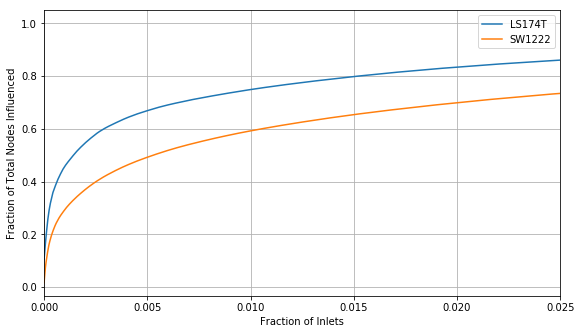

[0.10492846 0.16252904 0.21297542 ... 0.99981656 0.99987771 0.99993885]
[0.01625181 0.03153847 0.04581329 ... 0.74762994 0.74772335 0.74781675]


In [17]:
plt.figure()
plt.plot(np.arange(len(nodes_covered_frac_LS))/float(total_nodes_LS), nodes_covered_frac_LS, label='LS174T')
plt.plot(np.arange(len(nodes_covered_frac_SW))/float(total_nodes_SW), nodes_covered_frac_SW, label='SW1222')
plt.legend()
plt.grid()
plt.xlim(0,0.025)
xticks = plt.gca().xaxis.get_major_ticks()
# xticks[0].set_visible(False)
# plt.yscale('log')
plt.xlabel('Fraction of Inlets')
plt.ylabel('Fraction of Total Nodes Influenced')
plt.gcf().set_size_inches(9.25, 5.25)
plt.savefig('../figs/influence_maximisation.pdf')
plt.show()


In [21]:
print(np.argmax(np.arange(len(nodes_covered_frac_SW))/float(total_nodes_SW)>0.02))
print(nodes_covered_frac_LS[328])
print(nodes_covered_frac_SW[1285])

1285
0.8343524519995108
0.6990924516259593
